# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

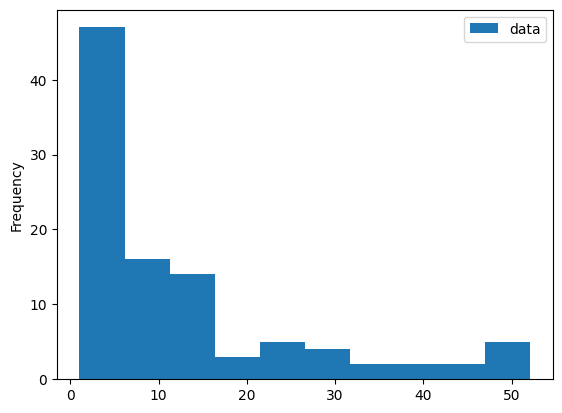

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

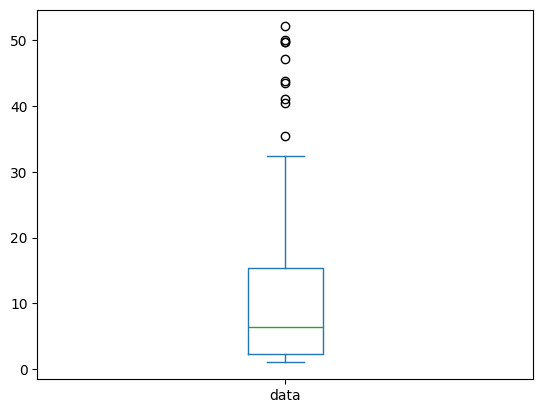

In [3]:
df.plot.box()

**Histogram**

Pros :
1. Distribution Shape : The histogram provides a clear visualization of the overall distribution of drug prices, showing how frequently different price ranges occur.
2. Skewness Identification : Since the data is generated using an exponential function (np.exp), it is likely skewed. A histogram makes this skewness visually apparent. This histrogram has a long tail on the right side, so it shows postive skewness. 
3. Granularity : It shows the density of data points across different price ranges, helping to identify clusters or gaps in the data.

Cons :
1. Lack of Specific Quantiles : While the histogram shows general trends, it does not explicitly highlight specific quantiles (e.g., median, quartiles) that are critical for understanding "how much the more expensive drugs tend to cost."
2. Bin Sensitivity : The appearance of the histogram depends on the number of bins chosen. Poor binning can obscure patterns or create misleading impressions.

**Boxplot**

Pros :
1. Quantile Information : The boxplot explicitly shows key statistics such as the median, interquartile range (IQR), and outliers, which are essential for answering the administrator's question about the cost of more expensive drugs.
2. Outlier Detection : The boxplot highlights potential outliers (e.g., extremely expensive drugs), making it easier to focus on these values.
3. Compact Representation : It summarizes the data in a concise way, making it easy to compare distributions if multiple datasets were involved.

Cons :
1. Limited Distribution Details : The boxplot does not show the detailed shape of the distribution (e.g., skewness or multimodality, kurtosis etc).
2. Less Intuitive for Non-Experts : For users unfamiliar with boxplots, interpreting the meaning of whiskers, quartiles, and outliers may require additional explanation.

**Which Representation would be a better choice?**

To answer the administrator's question—"How much do the more expensive drugs tend to cost, in the context of the other prices?"—the boxplot is the better choice. This is because:

1. It directly highlights the upper quartile (75th percentile) and outliers, which correspond to the "more expensive drugs."
2. It provides a clear numerical context for these expensive drugs relative to the rest of the data (e.g., median and IQR).

The histogram, while useful for understanding the overall distribution, does not emphasize specific quantiles or outliers as effectively.

**Modifications to Improve Visual Clarity and Interest**

For the Boxplot :
1. Add Labels for Key Statistics : Annotate the plot with the exact values of the median, 75th percentile, and any outliers to make it more informative.
Example: Add a text annotation like "75th Percentile: $X" near the upper quartile line.
2. Color Coding : Use contrasting colors for the box (e.g., light blue for the IQR) and outliers (e.g., red dots) to draw attention to the more expensive drugs.
3. Logarithmic Scale : Since the data is exponentially distributed, applying a logarithmic scale to the y-axis can make the boxplot easier to interpret.
4. Title and Context : Add a descriptive title, such as "Distribution of Drug Prices with Focus on Expensive Drugs".
Include axis labels, e.g., "Drug Price ($)".

For the Histogram :
1. Overlay Summary Statistics : Add vertical lines or annotations for the median, 75th percentile, and mean to provide additional context.
2. Adjust Bin Width : Experiment with different bin sizes to ensure the histogram accurately reflects the data's distribution without being overly granular or oversimplified.
3. Highlight the Upper Tail : Use a different color or shading for the bins corresponding to the upper quartile and above to emphasize the more expensive drugs.
4. Logarithmic Scale : Apply a logarithmic scale to the x-axis to better visualize the long tail of the exponential distribution.


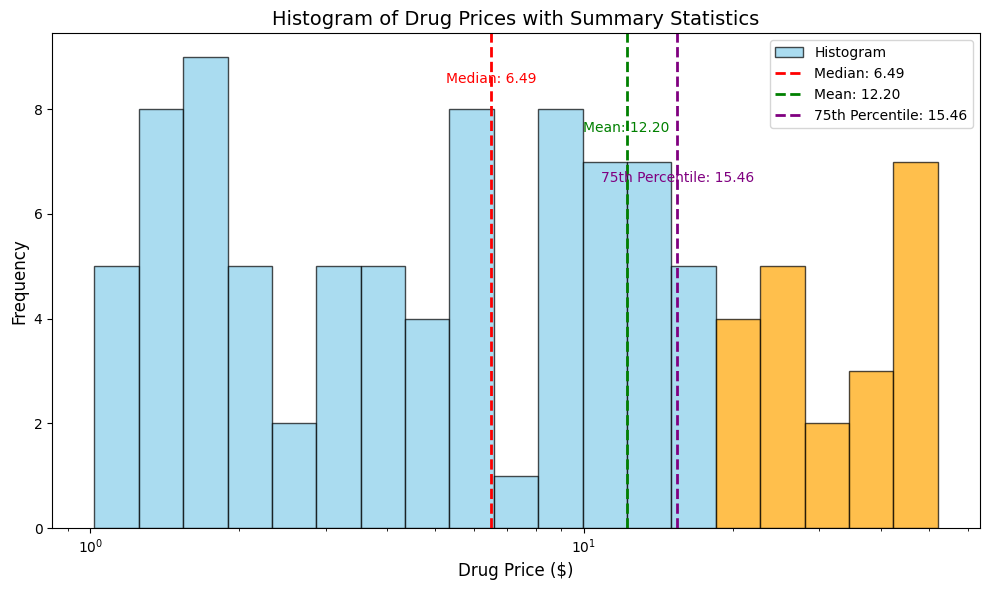

In [ ]:
# Histogram 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate the data
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

# Calculate summary statistics
median = df["data"].median()
mean = df["data"].mean()
q75 = df["data"].quantile(q=0.75)

# Create the histogram
plt.figure(figsize=(10, 6))

# Adjust bin width
bins = np.logspace(np.log10(df["data"].min()), np.log10(df["data"].max()), 20)  # Logarithmic bins
hist, edges, patches = plt.hist(df["data"], bins=bins, edgecolor="black", alpha=0.7, color="skyblue", label="Histogram")

# Highlight the upper tail (bins >= 75th percentile)
for i, patch in enumerate(patches):
    if edges[i] >= q75:  # Highlight bins corresponding to the upper quartile and above
        patch.set_facecolor("orange")

# Overlay summary statistics
plt.axvline(median, color="red", linestyle="--", linewidth=2, label=f"Median: {median:.2f}")
plt.axvline(mean, color="green", linestyle="--", linewidth=2, label=f"Mean: {mean:.2f}")
plt.axvline(q75, color="purple", linestyle="--", linewidth=2, label=f"75th Percentile: {q75:.2f}")

# Add annotations for summary statistics
plt.text(median, plt.ylim()[1] * 0.9, f"Median: {median:.2f}", color="red", ha="center")
plt.text(mean, plt.ylim()[1] * 0.8, f"Mean: {mean:.2f}", color="green", ha="center")
plt.text(q75, plt.ylim()[1] * 0.7, f"75th Percentile: {q75:.2f}", color="purple", ha="center")

# Apply logarithmic scale to the x-axis
plt.xscale("log")

# Add labels, title, and legend
plt.xlabel("Drug Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Drug Prices with Summary Statistics", fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

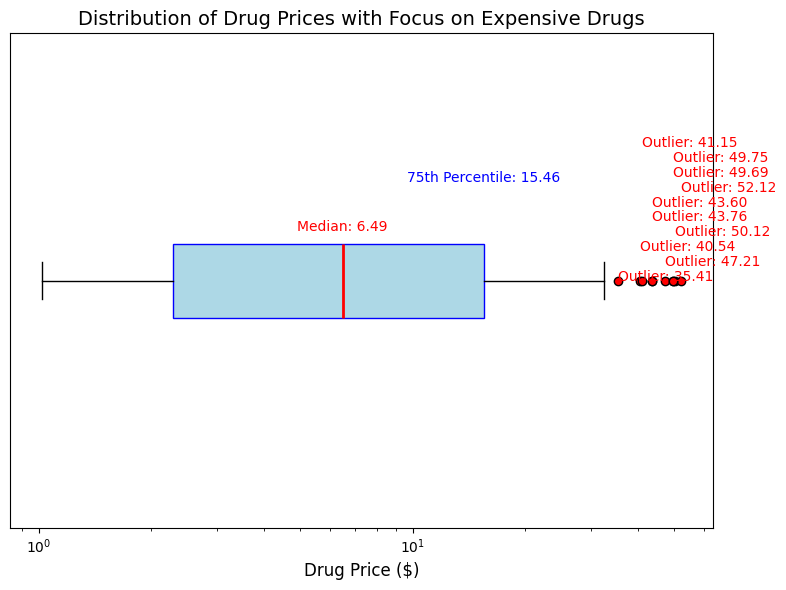

In [15]:
# Boxplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate the data
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

# Calculate summary statistics
median = df["data"].median()
q75 = df["data"].quantile(q=0.75)
outliers = df[df["data"] > q75 + 1.5 * (q75 - df["data"].quantile(q=0.25))]["data"]

# Create the boxplot
plt.figure(figsize=(8, 6))

# Boxplot with color coding
boxprops = dict(color="blue", facecolor="lightblue")  # IQR box color
medianprops = dict(color="red", linewidth=2)         # Median line color
flierprops = dict(marker='o', markerfacecolor="red", markersize=6, linestyle='none')  # Outliers color

# Plot the boxplot
box = plt.boxplot(df["data"], vert=False, patch_artist=True, boxprops=boxprops,
                  medianprops=medianprops, flierprops=flierprops)

# Add annotations for key statistics
plt.text(median, 1.1, f"Median: {median:.2f}", color="red", ha="center")
plt.text(q75, 1.2, f"75th Percentile: {q75:.2f}", color="blue", ha="center")

# Annotate outliers
for i, outlier in enumerate(outliers):
    plt.text(outlier, 1.0 + 0.03 * i, f"Outlier: {outlier:.2f}", color="red", ha="left")

# Apply logarithmic scale to the x-axis
plt.xscale("log")

# Add title and axis labels
plt.title("Distribution of Drug Prices with Focus on Expensive Drugs", fontsize=14)
plt.xlabel("Drug Price ($)", fontsize=12)
plt.yticks([])  # Remove y-axis ticks since there's only one group

# Show the plot
plt.tight_layout()
plt.show()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

Important Note: Own dataset will be used for the Homework 04. I am going to use the Red Wine Dataset, which has been used in the previous semster, Fall 2024. 

In [3]:
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

red_wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
red_wine.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).**

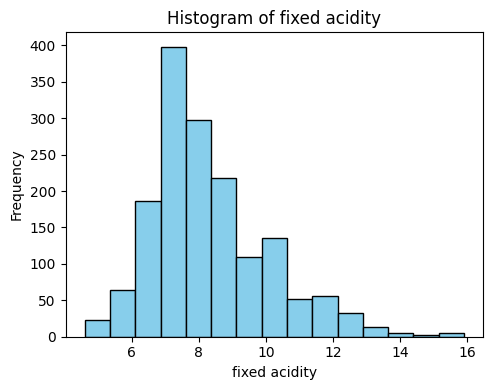

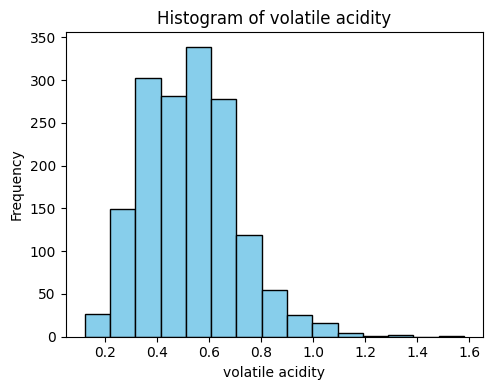

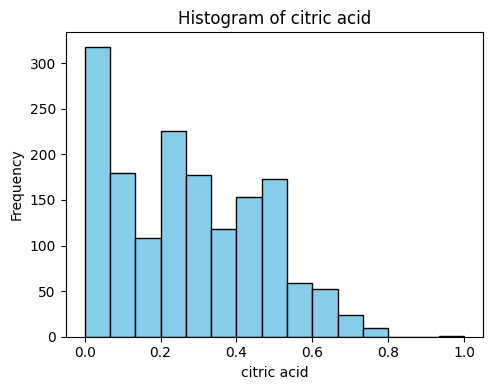

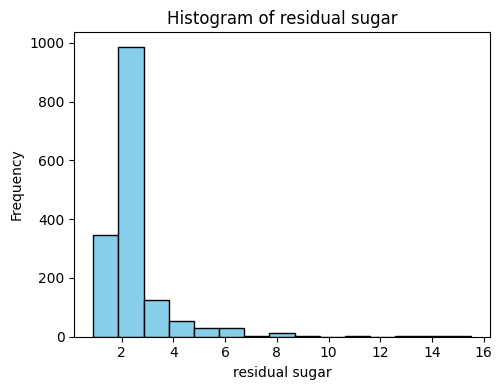

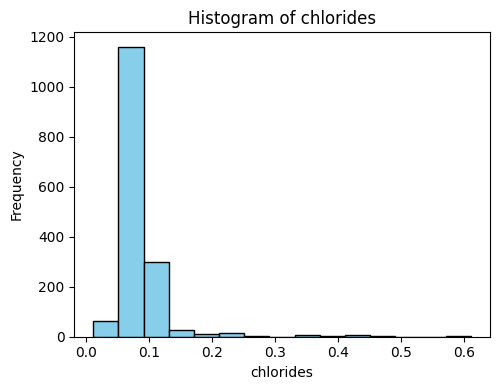

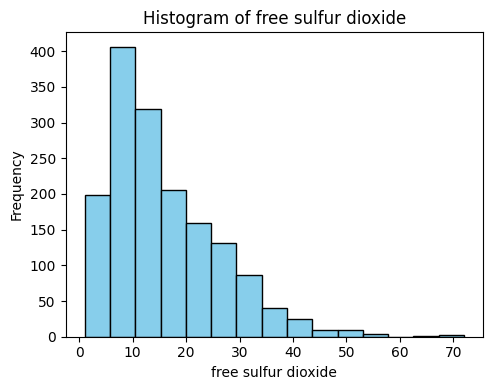

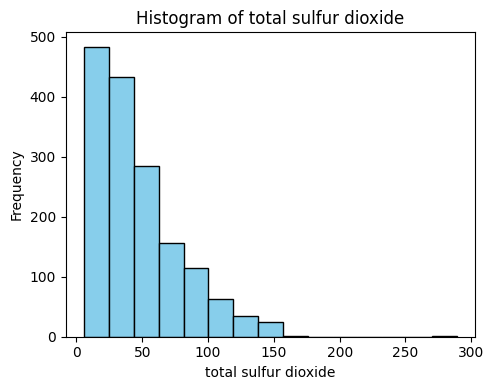

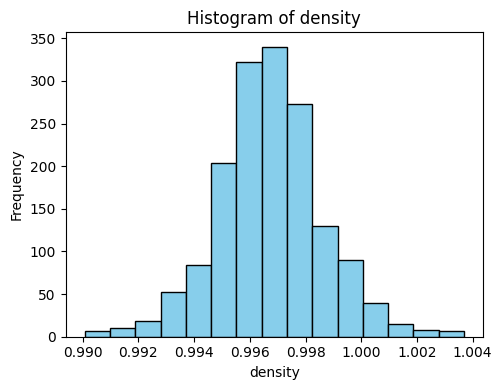

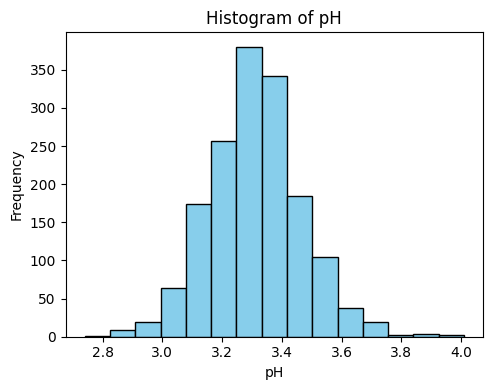

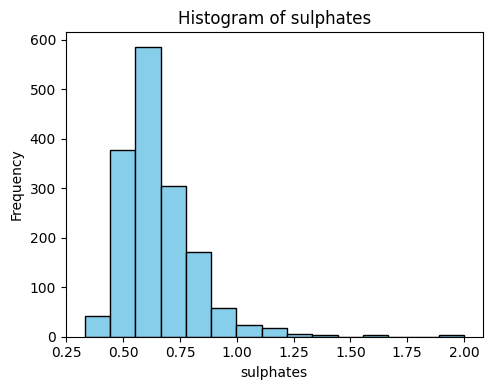

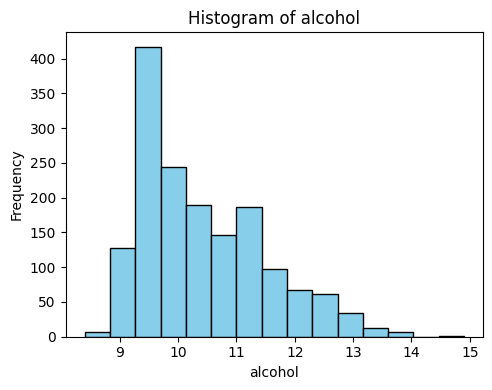

In [5]:
# Draw Histogram for each Feature/ Column
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(18, 4))
    
    # Histogram
    plt.subplot(1, 4, 1)
    plt.hist(red_wine[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)

    plt.tight_layout()
    plt.show()

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


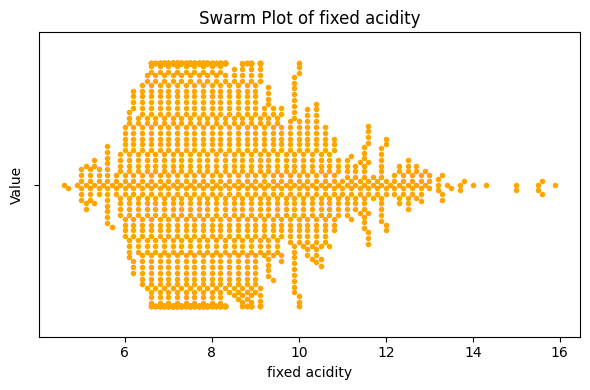

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


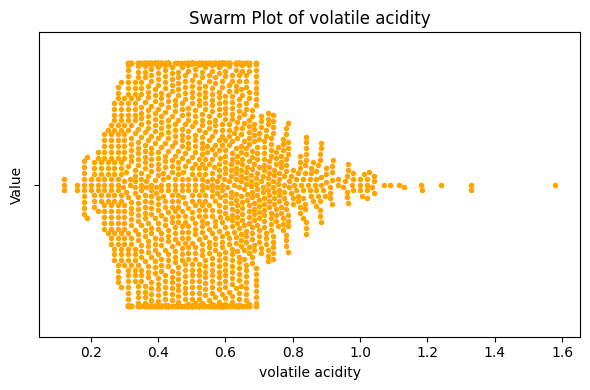

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


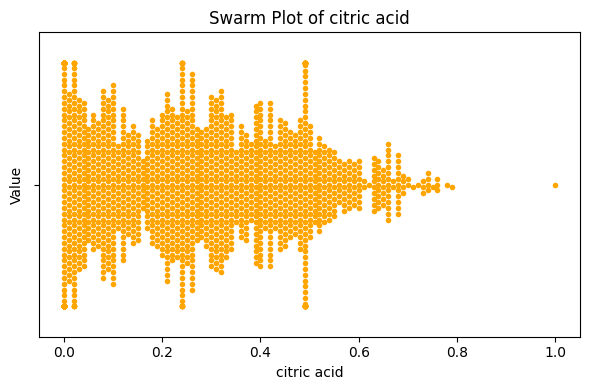

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


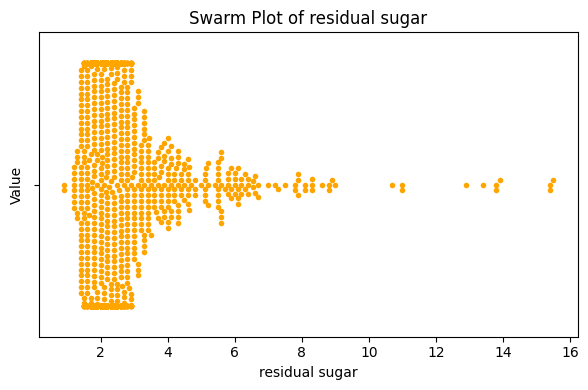

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


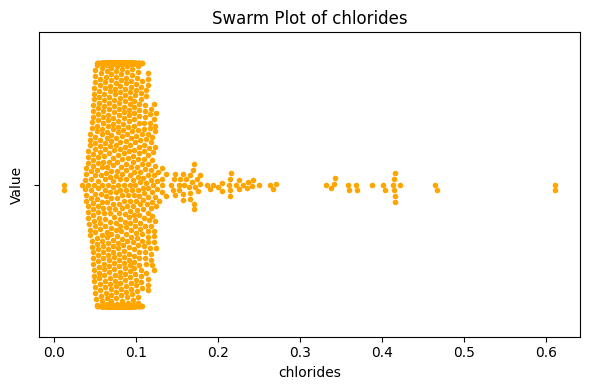

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


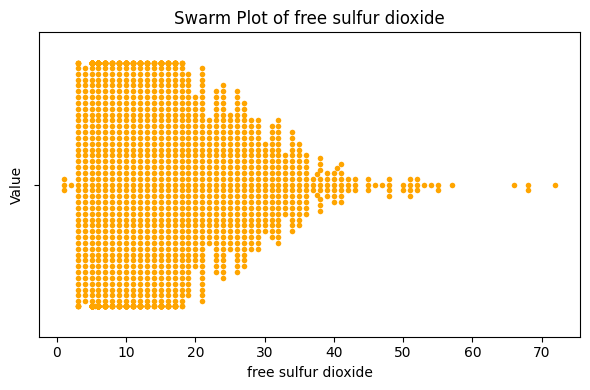

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


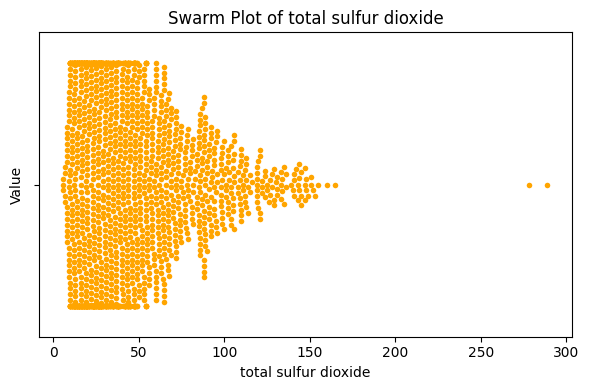

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


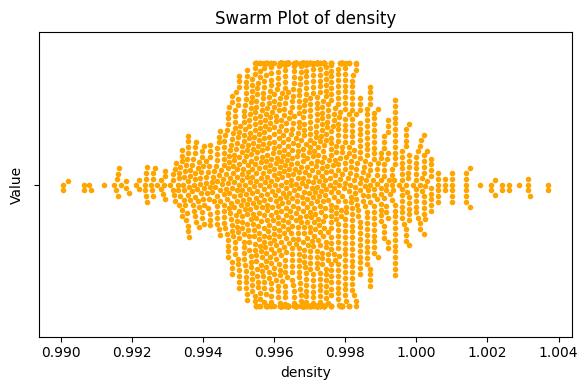

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


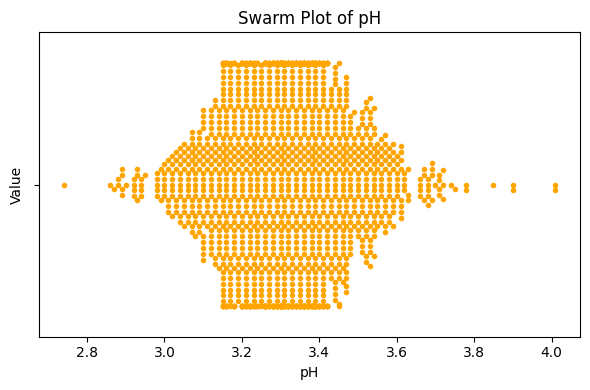

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


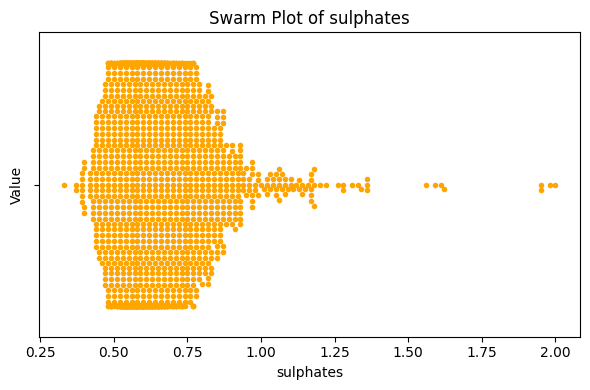

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


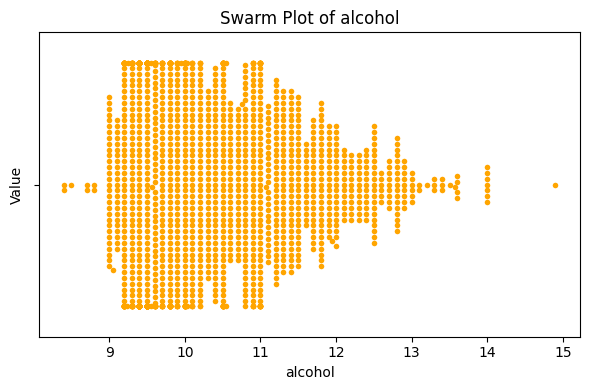

In [6]:
# Draw SwarmPlot for each Feature/ Column
import seaborn as sns

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(6, 4))
    sns.swarmplot(x=red_wine[column], color="orange", size=4)
    plt.title(f"Swarm Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Value", fontsize=10)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


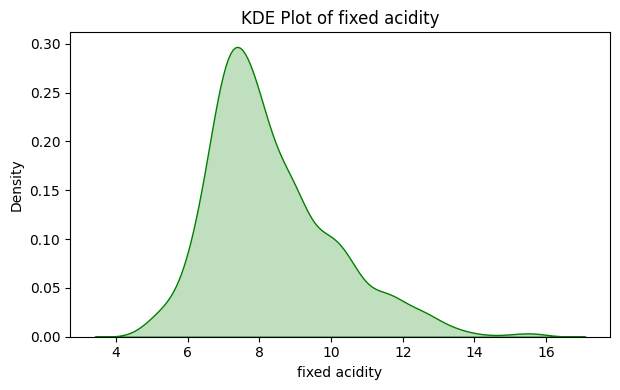

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


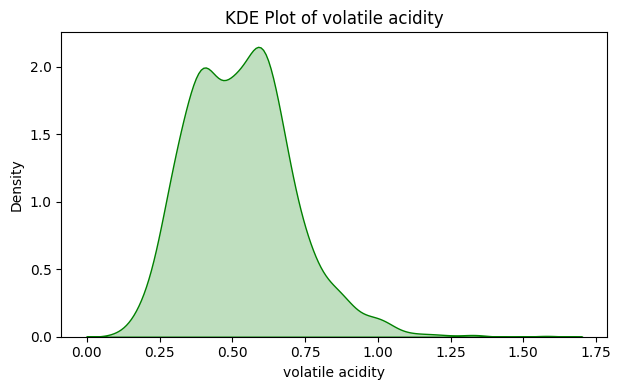

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


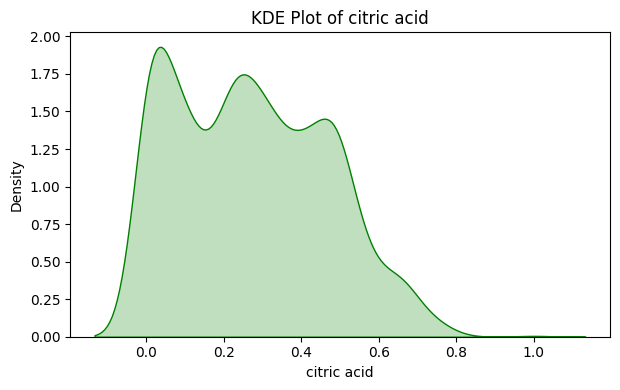

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


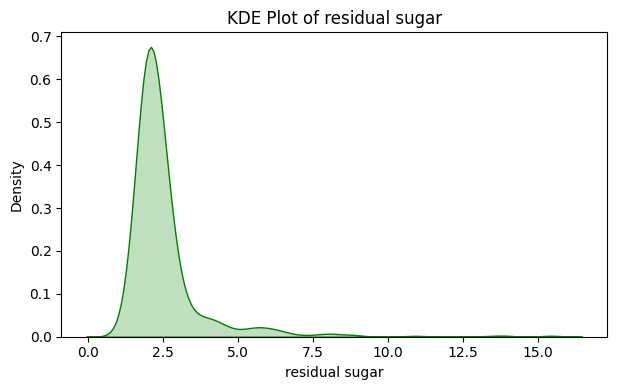

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


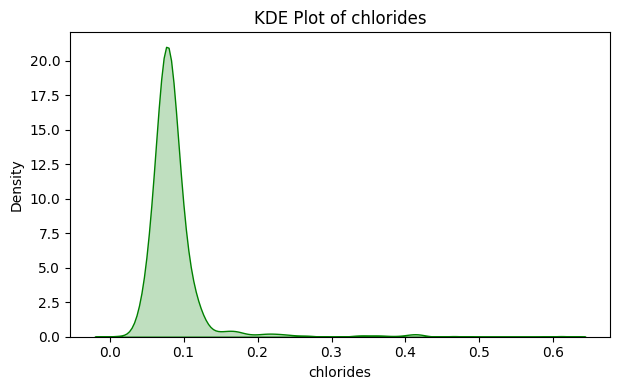

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


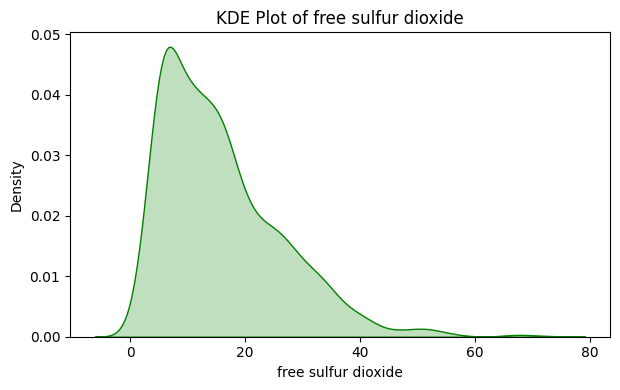

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


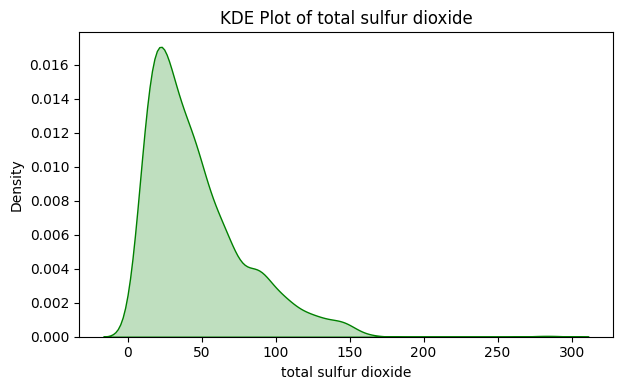

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


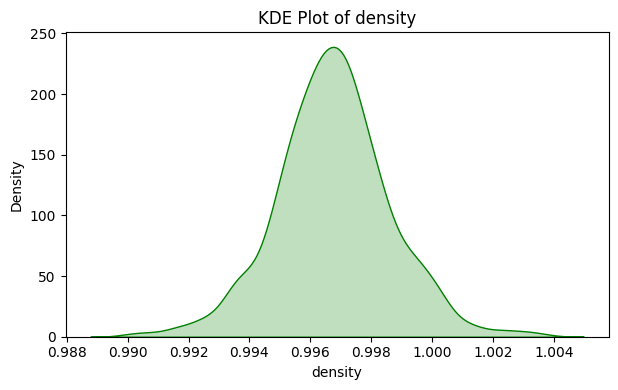

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


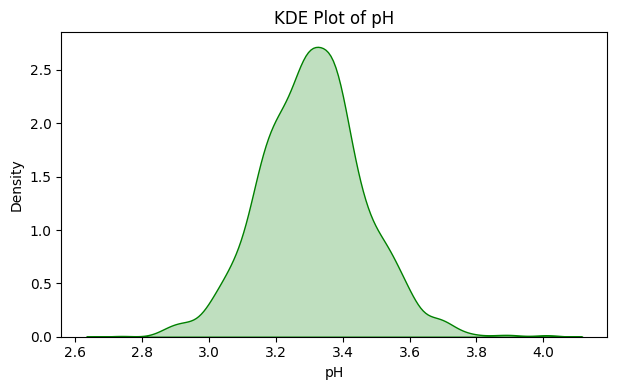

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


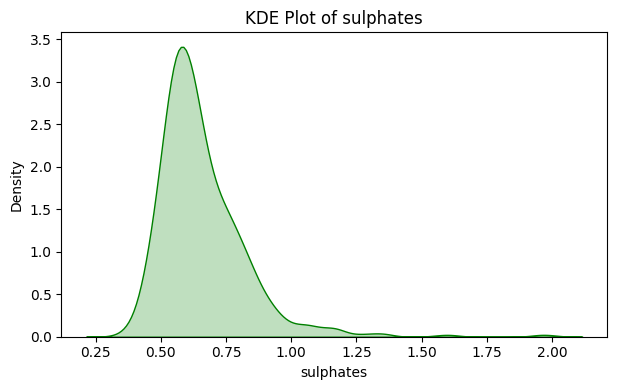

/tmp/ipykernel_1722/2395802657.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True)


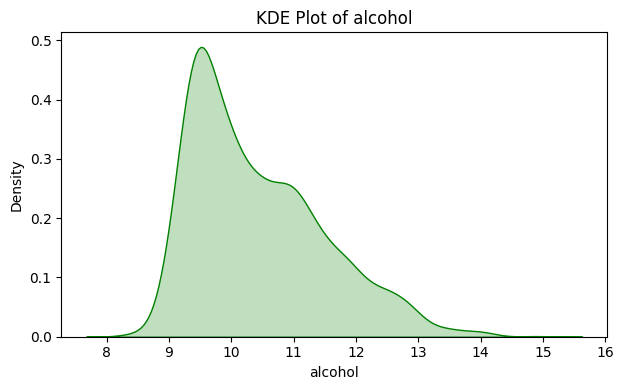

In [7]:
# Draw KDE Plot for each Feature/ Column
import seaborn as sns

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(18, 4))

    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(red_wine[column], color="green", shade=True)
    plt.title(f"KDE Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Density", fontsize=10)

    plt.tight_layout()
    plt.show()



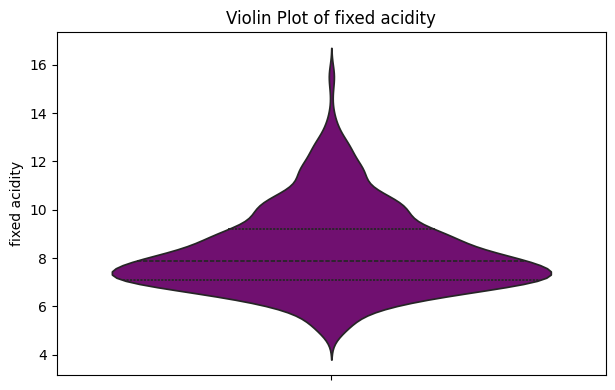

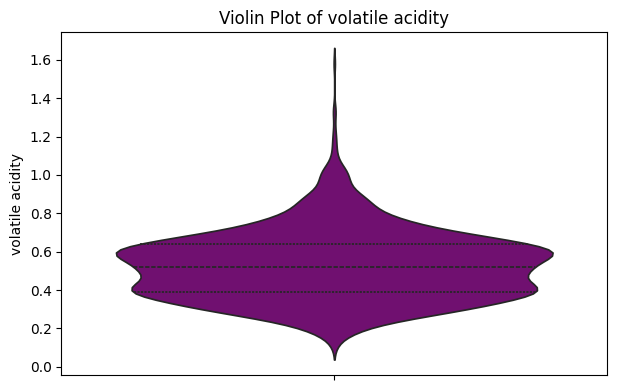

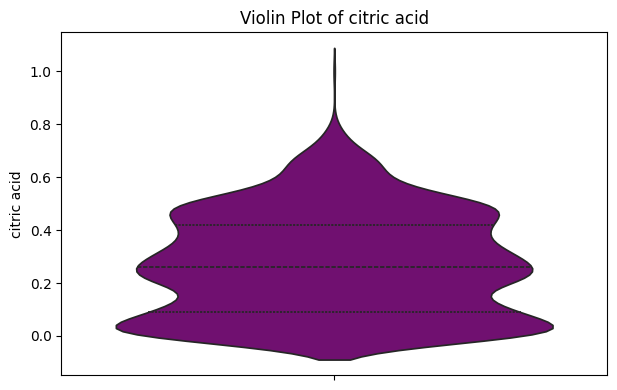

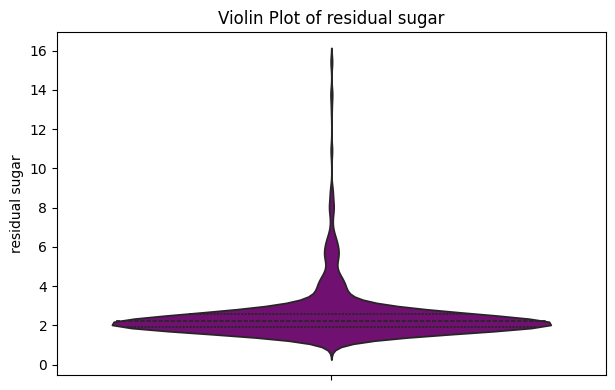

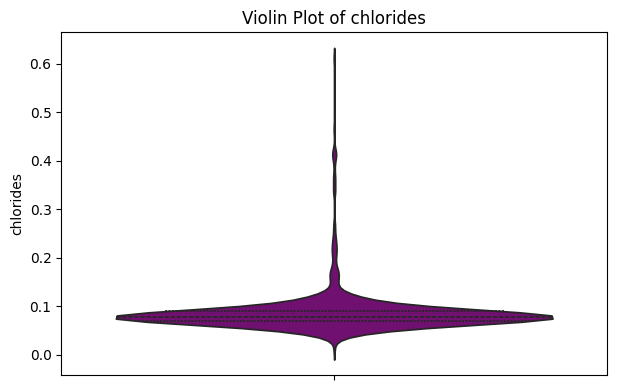

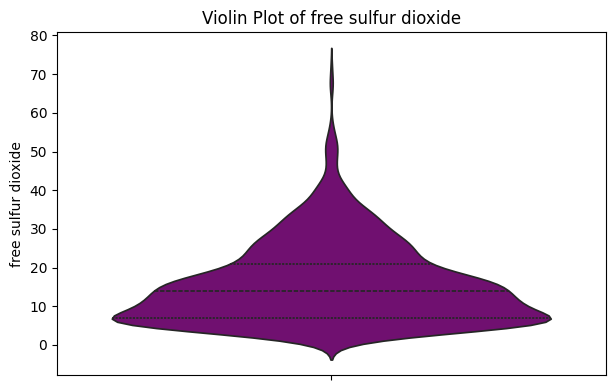

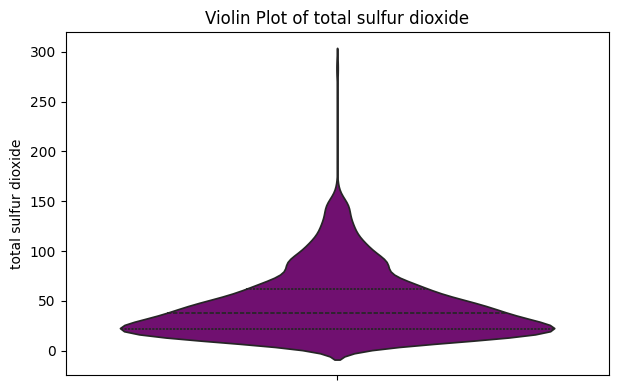

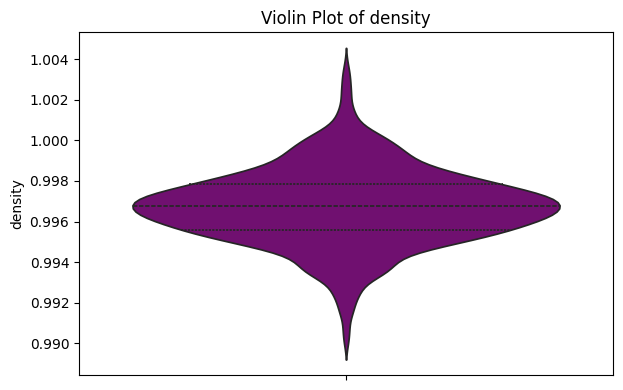

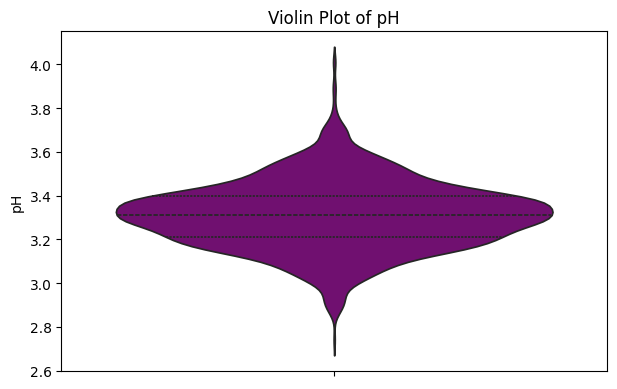

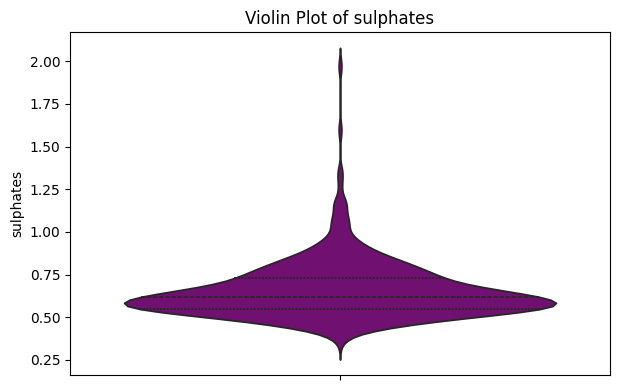

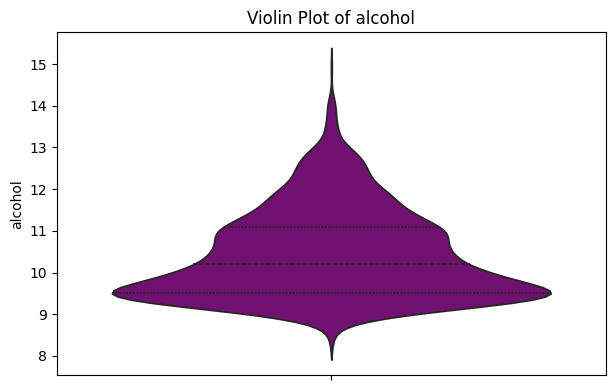

In [8]:
# Draw Violin Plot for each Feature/ Column 

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    plt.figure(figsize=(18, 4))
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(y=red_wine[column], color="purple", inner="quartile")
    plt.title(f"Violin Plot of {column}", fontsize=12)
    plt.ylabel(column, fontsize=10)
    
    plt.tight_layout()
    plt.show()



/tmp/ipykernel_1722/893167733.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True, ax=axes[4 * i + 2])
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1722/893167733.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine[column], color="green", shade=True, ax=axes[4 * i + 2])
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

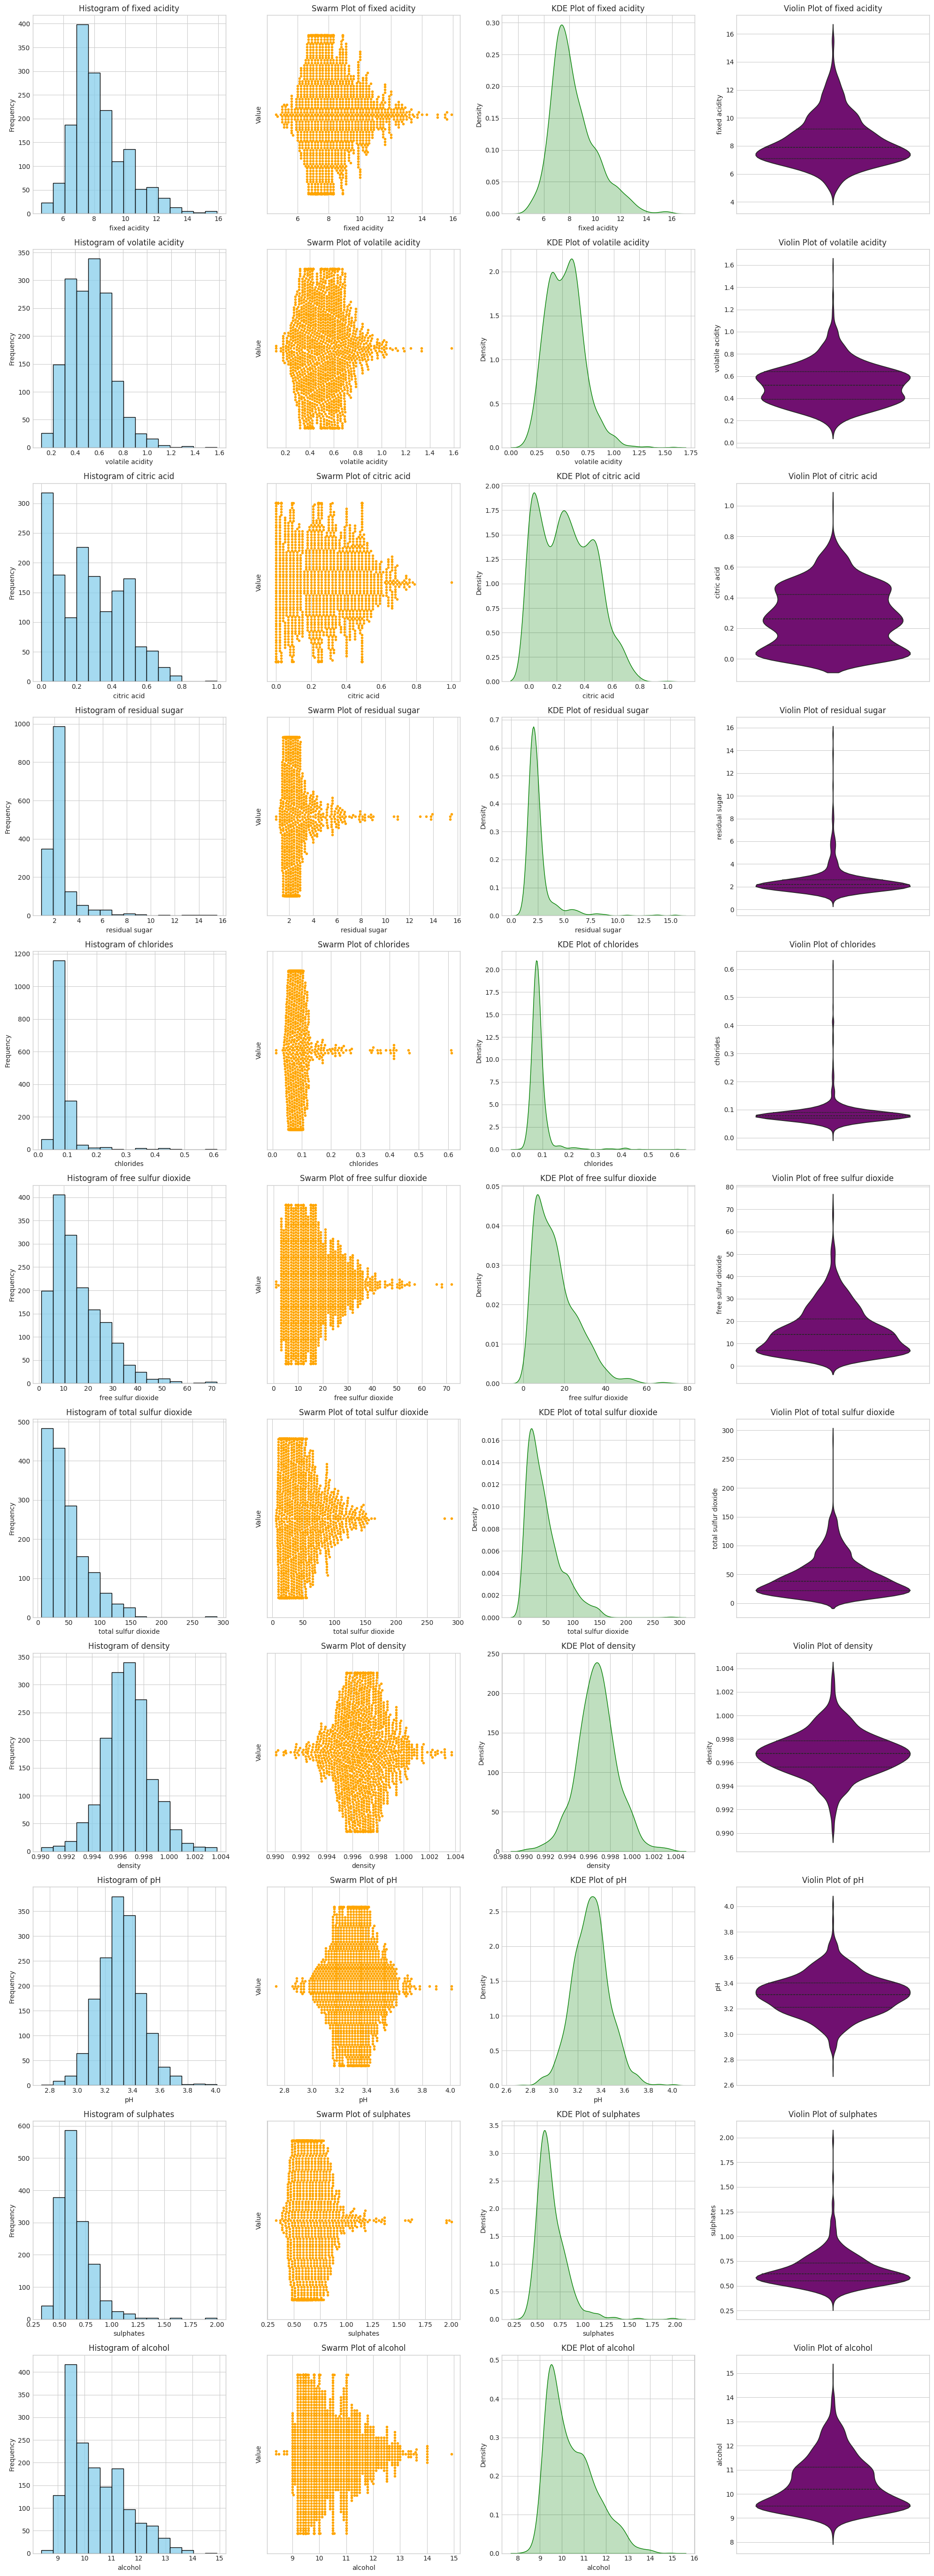

In [12]:

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Create a grid for all features (12 features × 4 plots per feature = 48 subplots)
num_features = len(red_wine.columns[:-1])  # Exclude 'target'
fig, axes = plt.subplots(num_features, 4, figsize=(20, 5 * num_features))  # 12 rows, 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column (excluding the target column)
for i, column in enumerate(red_wine.columns[:-1]):  # Exclude 'target'
    # Histogram
    sns.histplot(red_wine[column], bins=15, color="skyblue", edgecolor="black", ax=axes[4 * i])
    axes[4 * i].set_title(f"Histogram of {column}", fontsize=12)
    axes[4 * i].set_xlabel(column, fontsize=10)
    axes[4 * i].set_ylabel("Frequency", fontsize=10)  
    
    # Swarm Plot
    sns.swarmplot(x=red_wine[column], color="orange", size=4, ax=axes[4 * i + 1])
    axes[4 * i + 1].set_title(f"Swarm Plot of {column}", fontsize=12)
    axes[4 * i + 1].set_xlabel(column, fontsize=10)
    axes[4 * i + 1].set_ylabel("Value", fontsize=10)
    
    # KDE Plot
    sns.kdeplot(red_wine[column], color="green", shade=True, ax=axes[4 * i + 2])
    axes[4 * i + 2].set_title(f"KDE Plot of {column}", fontsize=12)
    axes[4 * i + 2].set_xlabel(column, fontsize=10)
    axes[4 * i + 2].set_ylabel("Density", fontsize=10)
    
    # Violin Plot
    sns.violinplot(y=red_wine[column], color="purple", inner="quartile", ax=axes[4 * i + 3])
    axes[4 * i + 3].set_title(f"Violin Plot of {column}", fontsize=12)
    axes[4 * i + 3].set_ylabel(column, fontsize=10)

# Hide any unused subplots
for j in range(len(red_wine.columns[:-1]) * 4, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.